### Import modules

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rcParams
import kennard_stone
import numpy as np
import pandas as pd

The class is called in a special way for the following reasons.

> weak "internal use" indicator. E.g. `from M import *`

> does not import objects whose names start with an underscore.

In [2]:
_KennardStone = kennard_stone.kennard_stone._KennardStone

### For reproducibility of random number generation

In [3]:
np.random.seed(334)

### Two-dimensional random number generation

In [4]:
example = np.random.rand(2, 100)

### Create an instance and compute indexes.

In [5]:
ks = _KennardStone(prior = 'train')
indexes = ks._get_indexes(example.transpose())

### Set layout of figure.

In [6]:
rcParams['font.size'] = 13
rcParams['font.family'] = 'Helvetica'

### Showing in figures
It can be confirmed that it is possible to take all of them.

MovieWriter ffmpeg unavailable; using Pillow instead.


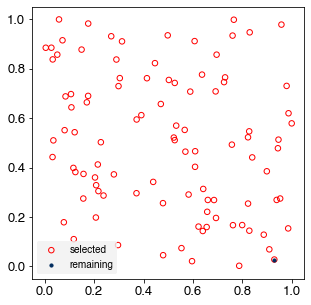

In [7]:
# figureオブジェクトの生成
fig = plt.figure(figsize = (5, 5), facecolor = 'white')
ax = fig.add_subplot(111)

# set_trace()
def scatter_(frame):    # 最初の引数は'frame' (何コマ目か)で固定．それ以外の引数はfargsでtupleとして与える．
    # 最初以外，グラフを一旦クリア
    if frame > 0:
        plt.cla()
    
    # scatter
    ax.scatter(*example[:, indexes[:frame]], label = 'selected', s = 30, facecolor = 'None', edgecolors = 'red')
    ax.scatter(*example[:, indexes[frame:]], label = 'remaining', s = 10, c = '#022c5e')

    # 正方形
    ax.set_aspect('equal', adjustable='box')

    # set_lim
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

    # legend
    ax.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10)

# gifアニメ作成
ani = FuncAnimation(fig, scatter_, interval = 200, frames = len(indexes))

# 保存
ani.save('simulate.gif')